# TTV Retrieval for Kepler-88 (the "king of TTVs")

In this notebook, we will perform a dynamical retrieval for Kepler-88 = KOI-142. This system has a single transiting planet with very large timing variations that imply a perturber; see [Nesvorny et al. 2013](https://ui.adsabs.harvard.edu/abs/2013ApJ...777....3N/abstract)). First, let's import packages and download data from the Rowe et al. (2015) TTV catalog:

Data retrieved!


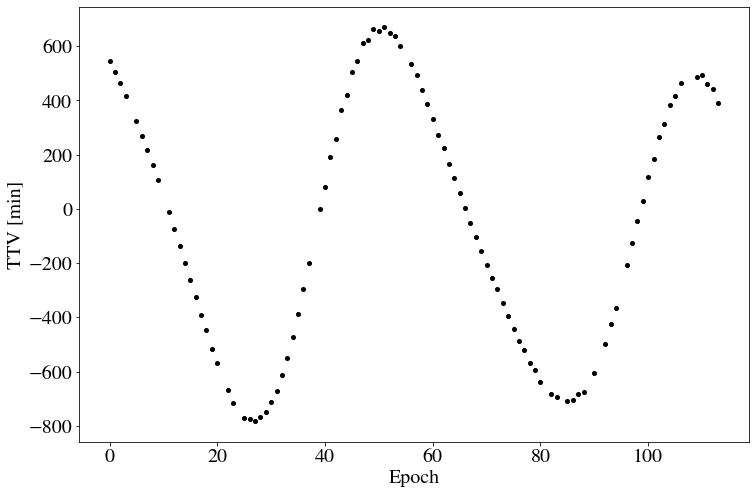

In [1]:
%matplotlib inline
import ttvnest
import numpy as np
koi = 142
nplanets = 1
data, errs, epochs = ttvnest.load_data.get_data(koi, nplanets)
system = ttvnest.TTVSystem()
system.data = [data[0][:101]]
system.errs = [errs[0][:101]]
system.epochs = [epochs[0][:101]]
ttvnest.plot_utils.plot_ttv_data(system)

Let's try to model it with ttvnest. I'll change the reference/simulation start time to $t_\mathrm{kep} + 55 = 2454955$ (BJD) to make the simulation run a little faster; note that this is very close to the reference epoch of Nesvorny et al. (2012).

In [2]:
data -= 55
kepler88_b = ttvnest.TTVPlanet(data[0], errs[0], epochs[0], log_mass_prior = ('Uniform', -3, 2.), 
                     period_prior = ('Normal', 10.95, 0.05),
                     inc_prior = ('Normal', 89.140, 0.089),
                     t0_prior = ('Normal', data[0][0] - epochs[0][0]*10.95, errs[0][0]))

kepler88_c = ttvnest.TTVPlanet(log_mass_prior = ('Uniform', np.log10(150.), np.log10(350.)), 
                     period_prior = ('Uniform', 20., 25.),
                     inc_prior = ('Uniform', 70., 90.),
                     longnode_prior = ('Periodic', 0., 360.))

kepler88 = ttvnest.TTVSystem(kepler88_b, kepler88_c, start_time = ttvnest.constants.tkep + 55, dt = 0.5, sim_length = 1480)

In [3]:
results = kepler88.retrieve()

3802it [02:31, 11.19it/s, batch: 0 | bound: 2 | nc: 25 | ncall: 40594 | eff(%):  9.141 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
7327it [08:15, 10.84it/s, batch: 0 | bound: 28 | nc: 25 | ncall: 133960 | eff(%):  5.429 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-    nan | dlogz:    inf >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warning

56718it [1:32:26, 11.08it/s, batch: 0 | bound: 375 | nc: 25 | ncall: 1490870 | eff(%):  3.802 | loglstar:   -inf < -64590.371 <    inf | logz: -64652.151 +/-    nan | dlogz: 934.686 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
57468it [1:34:10, 11.03it/s, batch: 0 | bound: 381 | nc: 25 | ncall: 1519318 | eff(%):  3.780 | loglstar:   -inf < -64444.713 <    inf | logz: -64507.911 +/-    nan | dlogz: 1049.820 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
66154it [1:54:32, 10.90it/s, batch: 0 | bound: 456 | nc: 25 | ncall: 1848773 | eff(%):  3.576 | loglstar:   -inf < -63261.239 <    inf | logz: -63332.235 +/-    nan | dlogz: 654.875 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
66539it [1:55:44, 10.58it/s, batch: 0 | bound: 460 | nc: 25 | ncall: 1868143 | eff(%):  3.560 | loglstar:   -in

77383it [2:18:20, 11.15it/s, batch: 0 | bound: 547 | nc: 25 | ncall: 2228288 | eff(%):  3.471 | loglstar:   -inf < -62284.797 <    inf | logz: -62366.683 +/-    nan | dlogz: 434.725 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
77820it [2:19:26, 10.94it/s, batch: 0 | bound: 551 | nc: 25 | ncall: 2246206 | eff(%):  3.463 | loglstar:   -inf < -62252.051 <    inf | logz: -62334.182 +/-    nan | dlogz: 443.264 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
84327it [2:34:30, 10.62it/s, batch: 0 | bound: 611 | nc: 25 | ncall: 2487777 | eff(%):  3.388 | loglstar:   -inf < -61811.937 <    inf | logz: -61900.227 +/-    nan | dlogz: 294.605 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
84609it [2:35:13, 11.19it/s, batch: 0 | bound: 614 | nc: 25 | ncall: 2499045 | eff(%):  3.384 | loglstar:   -inf

90303it [2:50:16, 10.53it/s, batch: 0 | bound: 667 | nc: 25 | ncall: 2743572 | eff(%):  3.290 | loglstar:   -inf < -61523.183 <    inf | logz: -61617.223 +/-    nan | dlogz: 277.841 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
90894it [2:51:42, 11.15it/s, batch: 0 | bound: 672 | nc: 25 | ncall: 2767250 | eff(%):  3.283 | loglstar:   -inf < -61495.567 <    inf | logz: -61590.315 +/-    nan | dlogz: 291.718 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
95118it [3:02:45, 11.02it/s, batch: 0 | bound: 716 | nc: 25 | ncall: 2947447 | eff(%):  3.226 | loglstar:   -inf < -61258.920 <    inf | logz: -61358.061 +/-    nan | dlogz: 409.730 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
95415it [3:03:32, 10.65it/s, batch: 0 | bound: 719 | nc: 25 | ncall: 2960227 | eff(%):  3.222 | loglstar:   -inf

98576it [3:12:36, 10.99it/s, batch: 0 | bound: 755 | nc: 25 | ncall: 3106859 | eff(%):  3.172 | loglstar:   -inf < -60972.959 <    inf | logz: -61076.147 +/-    nan | dlogz: 511.287 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
98708it [3:13:11, 10.87it/s, batch: 0 | bound: 757 | nc: 25 | ncall: 3116351 | eff(%):  3.166 | loglstar:   -inf < -60961.001 <    inf | logz: -61064.042 +/-    nan | dlogz: 499.025 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
102855it [3:24:29, 11.11it/s, batch: 0 | bound: 799 | nc: 25 | ncall: 3299042 | eff(%):  3.117 | loglstar:   -inf < -60626.077 <    inf | logz: -60732.978 +/-    nan | dlogz: 537.726 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
102993it [3:25:05, 10.97it/s, batch: 0 | bound: 801 | nc: 25 | ncall: 3308867 | eff(%):  3.112 | loglstar:   -i

108993it [3:38:54, 10.80it/s, batch: 0 | bound: 854 | nc: 25 | ncall: 3531745 | eff(%):  3.085 | loglstar:   -inf < -60113.377 <    inf | logz: -60226.440 +/-    nan | dlogz: 762.757 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
110534it [3:41:37, 11.02it/s, batch: 0 | bound: 866 | nc: 25 | ncall: 3575941 | eff(%):  3.090 | loglstar:   -inf < -59991.164 <    inf | logz: -60106.140 +/-    nan | dlogz: 658.367 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusti

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
115060it [3:52:52, 11.13it/s, batch: 0 | bound: 913 | nc: 25 | ncall: 3755854 | eff(%):  3.063 | loglstar:   -inf < -59526.478 <    inf | logz: -59646.055 +/-    nan | dlogz: 1075.640 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
115403it [3:53:50, 11.07it/s, batch: 0 | bound: 917 | nc: 25 | ncall: 3771741 | eff(%):  3.059 | loglstar:   -

121493it [4:06:46, 10.86it/s, batch: 0 | bound: 973 | nc: 25 | ncall: 3982032 | eff(%):  3.050 | loglstar:   -inf < -58815.728 <    inf | logz: -58942.289 +/-    nan | dlogz: 1123.562 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
121772it [4:07:28, 10.03it/s, batch: 0 | bound: 976 | nc: 25 | ncall: 3993313 | eff(%):  3.049 | loglstar:   -inf < -58761.305 <    inf | logz: -58888.370 +/-    nan | dlogz: 1203.528 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjus

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
126582it [4:18:01, 11.17it/s, batch: 0 | bound: 1023 | nc: 25 | ncall: 4163402 | eff(%):  3.040 | loglstar:   -inf < -57429.293 <    inf | logz: -57561.336 +/-    nan | dlogz: 1581.433 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
126876it [4:18:41, 11.05it/s, batch: 0 | bound: 1026 | nc: 25 | ncall: 4174381 | eff(%):  3.039 | loglstar:  

129326it [4:25:11, 11.05it/s, batch: 0 | bound: 1056 | nc: 25 | ncall: 4279637 | eff(%):  3.021 | loglstar:   -inf < -56507.126 <    inf | logz: -56641.677 +/-    nan | dlogz: 1733.103 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
130952it [4:27:54, 11.15it/s, batch: 0 | bound: 1068 | nc: 25 | ncall: 4324283 | eff(%):  3.028 | loglstar:   -inf < -55971.016 <    inf | logz: -56108.036 +/-    nan | dlogz: 1197.968 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adj

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
139967it [4:45:48, 10.41it/s, batch: 0 | bound: 1144 | nc: 25 | ncall: 4616767 | eff(%):  3.031 | loglstar:   -inf < -54099.815 <    inf | logz: -54244.323 +/-    nan | dlogz: 540.812 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
140102it [4:46:22, 10.75it/s, batch: 0 | bound: 1146 | nc: 25 | ncall: 4626133 | eff(%):  3.028 | loglstar:   

145556it [4:59:21, 10.92it/s, batch: 0 | bound: 1198 | nc: 25 | ncall: 4837859 | eff(%):  3.008 | loglstar:   -inf < -53573.055 <    inf | logz: -53722.882 +/-    nan | dlogz: 321.202 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
145814it [5:00:04, 10.24it/s, batch: 0 | bound: 1201 | nc: 25 | ncall: 4849328 | eff(%):  3.006 | loglstar:   -inf < -53555.744 <    inf | logz: -53705.740 +/-    nan | dlogz: 311.377 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjus

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
152188it [5:15:06, 10.78it/s, batch: 0 | bound: 1259 | nc: 25 | ncall: 5091905 | eff(%):  2.988 | loglstar:   -inf < -53186.044 <    inf | logz: -53341.873 +/-    nan | dlogz: 244.879 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
152684it [5:16:25, 11.09it/s, batch: 0 | bound: 1264 | nc: 25 | ncall: 5113165 | eff(%):  2.986 | loglstar:   

158480it [5:29:35, 11.15it/s, batch: 0 | bound: 1317 | nc: 25 | ncall: 5325439 | eff(%):  2.975 | loglstar:   -inf < -52949.536 <    inf | logz: -53111.229 +/-    nan | dlogz: 140.329 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
160210it [5:32:38, 10.52it/s, batch: 0 | bound: 1330 | nc: 25 | ncall: 5375335 | eff(%):  2.980 | loglstar:   -inf < -52906.776 <    inf | logz: -53069.758 +/-    nan | dlogz: 116.677 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjus

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
165567it [5:46:52, 11.01it/s, batch: 0 | bound: 1383 | nc: 25 | ncall: 5606683 | eff(%):  2.953 | loglstar:   -inf < -52803.774 <    inf | logz: -52971.876 +/-    nan | dlogz: 90.548 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
165845it [5:47:34, 10.94it/s, batch: 0 | bound: 1386 | nc: 25 | ncall: 5617786 | eff(%):  2.952 | loglstar:   -

169890it [5:58:59, 11.06it/s, batch: 0 | bound: 1429 | nc: 25 | ncall: 5801669 | eff(%):  2.928 | loglstar:   -inf < -52741.660 <    inf | logz: -52914.083 +/-    nan | dlogz: 141.563 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
170153it [5:59:40, 10.46it/s, batch: 0 | bound: 1432 | nc: 25 | ncall: 5812397 | eff(%):  2.927 | loglstar:   -inf < -52737.954 <    inf | logz: -52910.559 +/-    nan | dlogz: 137.775 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adju

176587it [6:14:27,  4.36it/s, batch: 0 | bound: 1495 | nc: 288 | ncall: 6049778 | eff(%):  2.918 | loglstar:   -inf < -52616.206 <    inf | logz: -52795.575 +/-    nan | dlogz: 114.722 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
176661it [6:14:48,  4.87it/s, batch: 0 | bound: 1496 | nc: 25 | ncall: 6055227 | eff(%):  2.917 | loglstar:   -inf < -52614.675 <    inf | logz: -52794.196 +/-    nan | dlogz: 113.271 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the

181453it [6:27:01, 11.09it/s, batch: 0 | bound: 1544 | nc: 25 | ncall: 6247977 | eff(%):  2.904 | loglstar:   -inf < -52537.191 <    inf | logz: -52721.227 +/-    nan | dlogz: 96.748 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
181891it [6:27:59, 10.92it/s, batch: 0 | bound: 1548 | nc: 25 | ncall: 6263147 | eff(%):  2.904 | loglstar:   -inf < -52531.062 <    inf | logz: -52715.532 +/-    nan | dlogz: 90.615 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusti

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
185595it [6:37:43, 11.12it/s, batch: 0 | bound: 1589 | nc: 25 | ncall: 6415760 | eff(%):  2.892 | loglstar:   -inf < -52474.103 <    inf | logz: -52662.225 +/-    nan | dlogz: 118.015 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
185735it [6:38:16, 10.42it/s, batch: 0 | bound: 1591 | nc: 25 | ncall: 6424068 | eff(%):  2.891 | loglstar:   

188579it [6:46:39, 10.91it/s, batch: 0 | bound: 1626 | nc: 25 | ncall: 6555350 | eff(%):  2.876 | loglstar:   -inf < -52422.924 <    inf | logz: -52614.251 +/-    nan | dlogz: 127.132 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
188945it [6:47:32, 11.09it/s, batch: 0 | bound: 1630 | nc: 25 | ncall: 6569543 | eff(%):  2.876 | loglstar:   -inf < -52416.989 <    inf | logz: -52608.634 +/-    nan | dlogz: 121.149 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjus

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
192429it [6:57:47, 10.86it/s, batch: 0 | bound: 1670 | nc: 25 | ncall: 6731951 | eff(%):  2.858 | loglstar:   -inf < -52357.768 <    inf | logz: -52552.723 +/-    nan | dlogz: 112.810 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
192526it [6:58:36, 11.08it/s, batch: 0 | bound: 1672 | nc: 25 | ncall: 6744847 | eff(%):  2.854 | loglstar:   -

205166it [7:23:07, 10.76it/s, batch: 0 | bound: 1777 | nc: 25 | ncall: 7143927 | eff(%):  2.871 | loglstar:   -inf < -52197.566 <    inf | logz: -52404.871 +/-    nan | dlogz: 53.335 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
205433it [7:23:52, 11.13it/s, batch: 0 | bound: 1780 | nc: 25 | ncall: 7155779 | eff(%):  2.870 | loglstar:   -inf < -52194.454 <    inf | logz: -52402.159 +/-    nan | dlogz: 50.358 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusti

214556it [7:43:00,  5.45it/s, batch: 0 | bound: 1860 | nc: 25 | ncall: 7470538 | eff(%):  2.872 | loglstar:   -inf < -52094.219 <    inf | logz: -52311.030 +/-    nan | dlogz: 52.520 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
214750it [7:43:33, 11.02it/s, batch: 0 | bound: 1862 | nc: 25 | ncall: 7479891 | eff(%):  2.871 | loglstar:   -inf < -52092.185 <    inf | logz: -52309.115 +/-    nan | dlogz: 50.618 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting t

217690it [7:54:12,  6.90it/s, batch: 0 | bound: 1905 | nc: 65 | ncall: 7658806 | eff(%):  2.842 | loglstar:   -inf < -52065.136 <    inf | logz: -52284.760 +/-    nan | dlogz: 51.316 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
217749it [7:54:32,  9.43it/s, batch: 0 | bound: 1906 | nc: 25 | ncall: 7664186 | eff(%):  2.841 | loglstar:   -inf < -52064.689 <    inf | logz: -52284.314 +/-    nan | dlogz: 50.811 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusti

220655it [8:03:43, 11.09it/s, batch: 0 | bound: 1940 | nc: 25 | ncall: 7817228 | eff(%):  2.822 | loglstar:   -inf < -52037.614 <    inf | logz: -52260.542 +/-    nan | dlogz: 137.810 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
220775it [8:04:16, 10.87it/s, batch: 0 | bound: 1942 | nc: 25 | ncall: 7826257 | eff(%):  2.821 | loglstar:   -inf < -52036.367 <    inf | logz: -52259.303 +/-    nan | dlogz: 136.449 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjus

226058it [8:16:20,  9.43it/s, batch: 0 | bound: 1993 | nc: 25 | ncall: 8025919 | eff(%):  2.816 | loglstar:   -inf < -51929.553 <    inf | logz: -52159.032 +/-    nan | dlogz: 165.868 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
226404it [8:17:07, 11.19it/s, batch: 0 | bound: 1997 | nc: 25 | ncall: 8038661 | eff(%):  2.816 | loglstar:   -inf < -51918.764 <    inf | logz: -52148.510 +/-    nan | dlogz: 154.997 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjus

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
230609it [8:27:17, 11.20it/s, batch: 0 | bound: 2043 | nc: 25 | ncall: 8205120 | eff(%):  2.810 | loglstar:   -inf < -51777.870 <    inf | logz: -52011.843 +/-    nan | dlogz: 222.839 >  0.010]/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
230806it [8:27:50, 11.12it/s, batch: 0 | bound: 2046 | nc: 25 | ncall: 8213795 | eff(%):  2.810 | loglstar:   -i

233436it [8:35:14, 10.38it/s, batch: 0 | bound: 2078 | nc: 25 | ncall: 8334168 | eff(%):  2.801 | loglstar:   -inf < -51666.943 <    inf | logz: -51903.914 +/-    nan | dlogz: 237.350 >  0.010]/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
233613it [8:35:48, 11.18it/s, batch: 0 | bound: 2081 | nc: 25 | ncall: 8343245 | eff(%):  2.800 | loglstar:   -inf < -51657.881 <    inf | logz: -51895.133 +/-    nan | dlogz: 228.396 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusti

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
235675it [8:42:38, 11.17it/s, batch: 0 | bound: 2111 | nc: 25 | ncall: 8450033 | eff(%):  2.789 | loglstar:   -inf < -51575.909 <    inf | logz: -51814.919 +/-    nan | dlogz: 191.462 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
235804it [8:43:06, 11.16it/s, batch: 0 | bound: 2113 | nc: 25 | ncall: 8457025 | eff(%):  2.788 | loglstar:   

239325it [8:52:23, 10.88it/s, batch: 0 | bound: 2152 | nc: 25 | ncall: 8603686 | eff(%):  2.781 | loglstar:   -inf < -51454.635 <    inf | logz: -51696.959 +/-    nan | dlogz: 171.367 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
239537it [8:53:00, 11.13it/s, batch: 0 | bound: 2155 | nc: 25 | ncall: 8613131 | eff(%):  2.781 | loglstar:   -inf < -51448.511 <    inf | logz: -51691.229 +/-    nan | dlogz: 165.430 >  0.010] /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjust

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
244994it [9:05:10, 11.18it/s, batch: 0 | bound: 2209 | nc: 25 | ncall: 8806915 | eff(%):  2.782 | loglstar:   -inf < -51290.799 <    inf | logz: -51538.964 +/-    nan | dlogz: 191.101 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
245370it [9:06:06, 11.25it/s, batch: 0 | bound: 2213 | nc: 25 | ncall: 8822057 | eff(%):  2.781 | loglstar:   

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
252330it [9:21:05,  6.19it/s, batch: 0 | bound: 2278 | nc: 25 | ncall: 9064199 | eff(%):  2.784 | loglstar:   -inf < -51099.100 <    inf | logz: -51354.237 +/-    nan | dlogz: 110.152 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
252414it [9:21:31, 11.21it/s, batch: 0 | bound: 2280 | nc: 25 | ncall: 9070552 | eff(%):  2.782 | loglstar:   

256507it [9:31:48,  9.88it/s, batch: 0 | bound: 2323 | nc: 47 | ncall: 9234543 | eff(%):  2.777 | loglstar:   -inf < -51022.347 <    inf | logz: -51281.115 +/-    nan | dlogz: 73.827 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
257095it [9:33:03, 11.16it/s, batch: 0 | bound: 2328 | nc: 25 | ncall: 9255010 | eff(%):  2.778 | loglstar:   -inf < -51015.116 <    inf | logz: -51274.527 +/-    nan | dlogz: 66.652 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusti

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
260974it [9:44:53, 11.24it/s, batch: 0 | bound: 2373 | nc: 25 | ncall: 9446500 | eff(%):  2.762 | loglstar:   -inf < -50975.426 <    inf | logz: -51238.607 +/-    nan | dlogz: 70.755 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
261243it [9:45:52,  5.55it/s, batch: 0 | bound: 2377 | nc: 191 | ncall: 9462795 | eff(%):  2.760 | loglstar:   

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
268889it [10:02:17,  9.89it/s, batch: 0 | bound: 2444 | nc: 25 | ncall: 9733989 | eff(%):  2.762 | loglstar:   -inf < -50892.737 <    inf | logz: -51163.634 +/-    nan | dlogz: 39.693 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
269108it [10:03:04, 11.11it/s, batch: 0 | bound: 2447 | nc: 25 | ncall: 9746666 | eff(%):  2.761 | loglstar:  

271580it [10:11:04, 11.23it/s, batch: 0 | bound: 2478 | nc: 25 | ncall: 9876951 | eff(%):  2.749 | loglstar:   -inf < -50872.039 <    inf | logz: -51145.234 +/-    nan | dlogz: 70.165 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
271820it [10:11:50, 10.79it/s, batch: 0 | bound: 2481 | nc: 25 | ncall: 9889590 | eff(%):  2.748 | loglstar:   -inf < -50870.301 <    inf | logz: -51143.817 +/-    nan | dlogz: 72.813 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjus

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
276165it [10:22:22,  6.94it/s, batch: 0 | bound: 2527 | nc: 25 | ncall: 10062997 | eff(%):  2.744 | loglstar:   -inf < -50829.687 <    inf | logz: -51108.132 +/-    nan | dlogz: 90.595 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
276675it [10:23:35, 10.68it/s, batch: 0 | bound: 2533 | nc: 25 | ncall: 10082980 | eff(%):  2.744 | loglstar:

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
281293it [10:35:15, 11.29it/s, batch: 0 | bound: 2581 | nc: 25 | ncall: 10275276 | eff(%):  2.737 | loglstar:   -inf < -50733.655 <    inf | logz: -51017.620 +/-    nan | dlogz: 121.770 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
281518it [10:36:14,  9.49it/s, batch: 0 | bound: 2584 | nc: 25 | ncall: 10291348 | eff(%):  2.735 | loglstar

287119it [10:52:13,  9.45it/s, batch: 0 | bound: 2636 | nc: 25 | ncall: 10555645 | eff(%):  2.720 | loglstar:   -inf < -50625.741 <    inf | logz: -50915.579 +/-    nan | dlogz: 99.434 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
287228it [10:53:00, 11.12it/s, batch: 0 | bound: 2638 | nc: 25 | ncall: 10568513 | eff(%):  2.718 | loglstar:   -inf < -50623.695 <    inf | logz: -50913.614 +/-    nan | dlogz: 97.360 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Ad

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
295602it [11:13:53, 11.20it/s, batch: 0 | bound: 2712 | nc: 25 | ncall: 10915044 | eff(%):  2.708 | loglstar:   -inf < -50499.867 <    inf | logz: -50797.653 +/-    nan | dlogz: 57.541 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
295696it [11:14:30, 11.24it/s, batch: 0 | bound: 2714 | nc: 25 | ncall: 10925132 | eff(%):  2.706 | loglstar

307208it [11:39:19, 11.13it/s, batch: 0 | bound: 2807 | nc: 25 | ncall: 11333026 | eff(%):  2.710 | loglstar:   -inf < -50389.471 <    inf | logz: -50698.516 +/-    nan | dlogz: 59.781 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
307327it [11:39:53, 11.20it/s, batch: 0 | bound: 2809 | nc: 25 | ncall: 11342477 | eff(%):  2.709 | loglstar:   -inf < -50388.494 <    inf | logz: -50697.649 +/-    nan | dlogz: 59.628 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adj

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
311605it [11:52:16, 10.25it/s, batch: 0 | bound: 2854 | nc: 25 | ncall: 11543870 | eff(%):  2.699 | loglstar:   -inf < -50350.527 <    inf | logz: -50664.060 +/-    nan | dlogz: 81.062 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
312191it [11:53:30, 11.25it/s, batch: 0 | bound: 2859 | nc: 25 | ncall: 11563965 | eff(%):  2.699 | loglstar:

316025it [12:03:21, 10.89it/s, batch: 0 | bound: 2899 | nc: 25 | ncall: 11723327 | eff(%):  2.695 | loglstar:   -inf < -50305.755 <    inf | logz: -50623.975 +/-    nan | dlogz: 61.380 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
316166it [12:03:58, 11.12it/s, batch: 0 | bound: 2901 | nc: 25 | ncall: 11733409 | eff(%):  2.694 | loglstar:   -inf < -50304.316 <    inf | logz: -50622.571 +/-    nan | dlogz: 62.678 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adj

/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
321996it [12:18:12, 10.71it/s, batch: 0 | bound: 2957 | nc: 25 | ncall: 11965800 | eff(%):  2.691 | loglstar:   -inf < -50236.103 <    inf | logz: -50560.176 +/-    nan | dlogz: 63.673 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
323264it [12:20:37, 11.17it/s, batch: 0 | bound: 2967 | nc: 25 | ncall: 12005642 | eff(%):  2.692 | loglstar:

328111it [12:32:26, 11.08it/s, batch: 0 | bound: 3014 | nc: 25 | ncall: 12199876 | eff(%):  2.689 | loglstar:   -inf < -50175.079 <    inf | logz: -50505.129 +/-    nan | dlogz: 60.676 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
332281it [12:39:10, 11.10it/s, batch: 0 | bound: 3045 | nc: 25 | ncall: 12311181 | eff(%):  2.699 | loglstar:   -inf < -50136.712 <    inf | logz: -50470.935 +/-    nan | dlogz: 49.359 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adj

341221it [13:00:47, 11.19it/s, batch: 0 | bound: 3121 | nc: 25 | ncall: 12672192 | eff(%):  2.692 | loglstar:   -inf < -50061.745 <    inf | logz: -50404.649 +/-    nan | dlogz: 53.050 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
341389it [13:01:37, 11.02it/s, batch: 0 | bound: 3124 | nc: 25 | ncall: 12686380 | eff(%):  2.691 | loglstar:   -inf < -50060.571 <    inf | logz: -50403.591 +/-    nan | dlogz: 51.824 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusti

343830it [13:35:51, 10.58it/s, batch: 0 | bound: 3152 | nc: 25 | ncall: 13270697 | eff(%):  2.591 | loglstar:   -inf < -50042.160 <    inf | logz: -50387.768 +/-    nan | dlogz: 45.411 >  0.010]   /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
343832it [13:38:06, 20.41s/it, batch: 0 | bound: 3152 | nc: 38696 | ncall: 13309418 | eff(%):  2.583 | loglstar:   -inf < -50042.160 <    inf | logz: -50387.754 +/-    nan | dlogz: 45.395 >  0.010]/usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjus

344242it [13:53:07,  2.42s/it, batch: 0 | bound: 3166 | nc: 25 | ncall: 13565941 | eff(%):  2.537 | loglstar:   -inf < -50038.890 <    inf | logz: -50384.973 +/-    nan | dlogz: 42.205 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
344247it [13:53:17,  1.74s/it, batch: 0 | bound: 3167 | nc: 25 | ncall: 13568832 | eff(%):  2.537 | loglstar:   -inf < -50038.854 <    inf | logz: -50384.936 +/-    nan | dlogz: 42.163 >  0.010]  /usr/local/lib/python3.7/site-packages/dynesty/sampling.py:238: UserWarning: Random walk proposals appear to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random walk proposals appear to be "
344268it [13:53:29,  4.50it/s, batch: 0 | bound: 3167 | nc: 25 | ncall: 13572122 | eff(%):  2.536 | loglstar:   -inf < -50038.659 <    inf | logz: -50

ValueError: low >= high

To match the Nesvorny et al. (2013) results, we should recover an upper limit on the mass of the transiting planet of 17.6, and a mass for the nontransiting planet of 215 (the solar mass is close to 1 so this is in dynamical masses). Let's see if we get there...

In [ ]:
kepler88.posterior_summary()
ttvnest.plot_utils.plot_results(kepler88, uncertainty_curves = 100, sim_length = 365.25*5)

In [ ]:
ttvnest.plot_utils.dynesty_plots(kepler88)